#### Evaluation Project - 5
# Census Income Project

#### Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.                     
                                             
* Description of fnlwgt (final weight)                                                                                   
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non- institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [228]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [229]:
# loading dataset and checking shape and head of the data
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
print("rows:",df.shape[0],"    columns:",df.shape[1])
df.head()

rows: 32560     columns: 15


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [230]:
# checking duplicated values
df.duplicated().sum()

24

- 
there are 24 duplicate rows let's drop them

In [231]:
# droping duplicate rows
df.drop_duplicates(keep='last', inplace=True)

In [232]:
# checking '?' in dataset
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [233]:
# replacing '?' with NaN
df=df.replace(' ?',np.NaN)

In [234]:
# checking ' ','NA','-' in dataset
df.isin([' ','NA','-']).sum().any()

False

In [235]:
# checking null values and info
df.isna().sum(),df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


(Age                  0
 Workclass         1836
 Fnlwgt               0
 Education            0
 Education_num        0
 Marital_status       0
 Occupation        1843
 Relationship         0
 Race                 0
 Sex                  0
 Capital_gain         0
 Capital_loss         0
 Hours_per_week       0
 Native_country     582
 Income               0
 dtype: int64,
 None)

- workclass, Occupation and native_country are the columns whcih has null values 1836, 1843 and 582 respectively,
- these columns are of object datatype so i can not use mean to fill null values
- i'll use mode to fill null values because of object data and by watching number of rows 

In [236]:
# Imputating Missing value with mode 
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [237]:
# checking null or missing values
df.isna().sum().sum()

0

- Now there is no null value in dataset we can move on now

In [238]:
# using label encoding to convert object data into numbers
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = lab.fit_transform(df[i])

In [239]:
# separating dataset into categorical and continous data
df_con = df.drop(columns=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income'])
df_cat = df.drop(columns=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week'])

In [240]:
# checking stats of continous data
df_con.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- data distribution in age looks good
- i can't say that data distribution in Fnlwgt is normal i'll check it in visualisation part
- Capital_gain, Capital_loss, Hours_per_week may contain outliers as there is sudden deviation from 3rd quantile to maximum value

<AxesSubplot:>

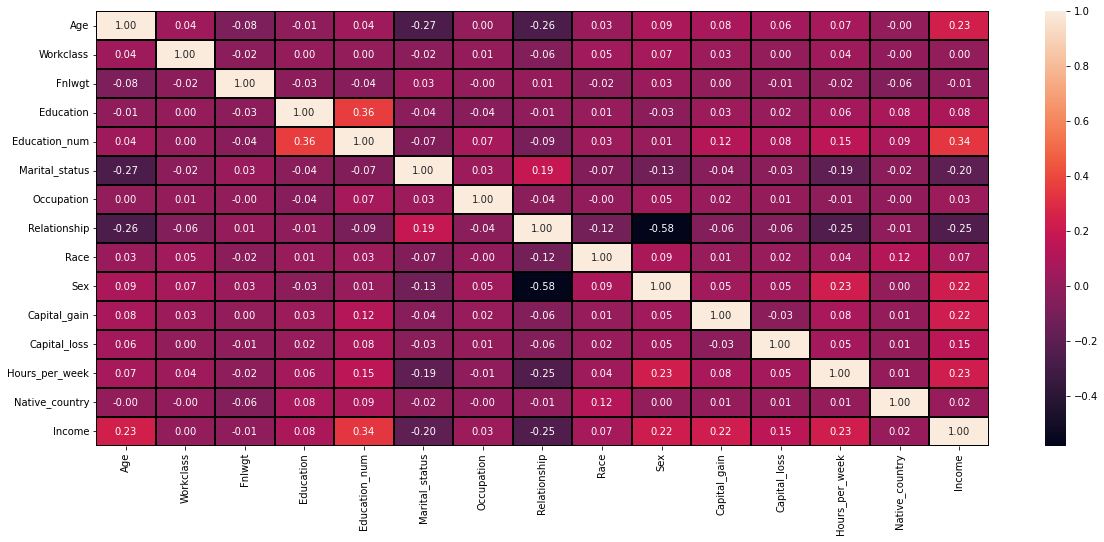

In [241]:
# checking correlation 
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

- list of columns which are correlated to me 'Income':                                                                   
'Sex','Capital_gain', 'Capital_loss', 'Hours_per_week','Relationship', 'Education_num','Marital_status','Age'
- there is multicolinearity between relationship and sex but relationship is negatively but more correlated with income so i'll drop sex 

In [242]:
# droping those columns which are not related with target column
df = df.drop(columns=['Workclass', 'Fnlwgt', 'Education', 'Occupation', 'Race', 'Sex','Native_country'])

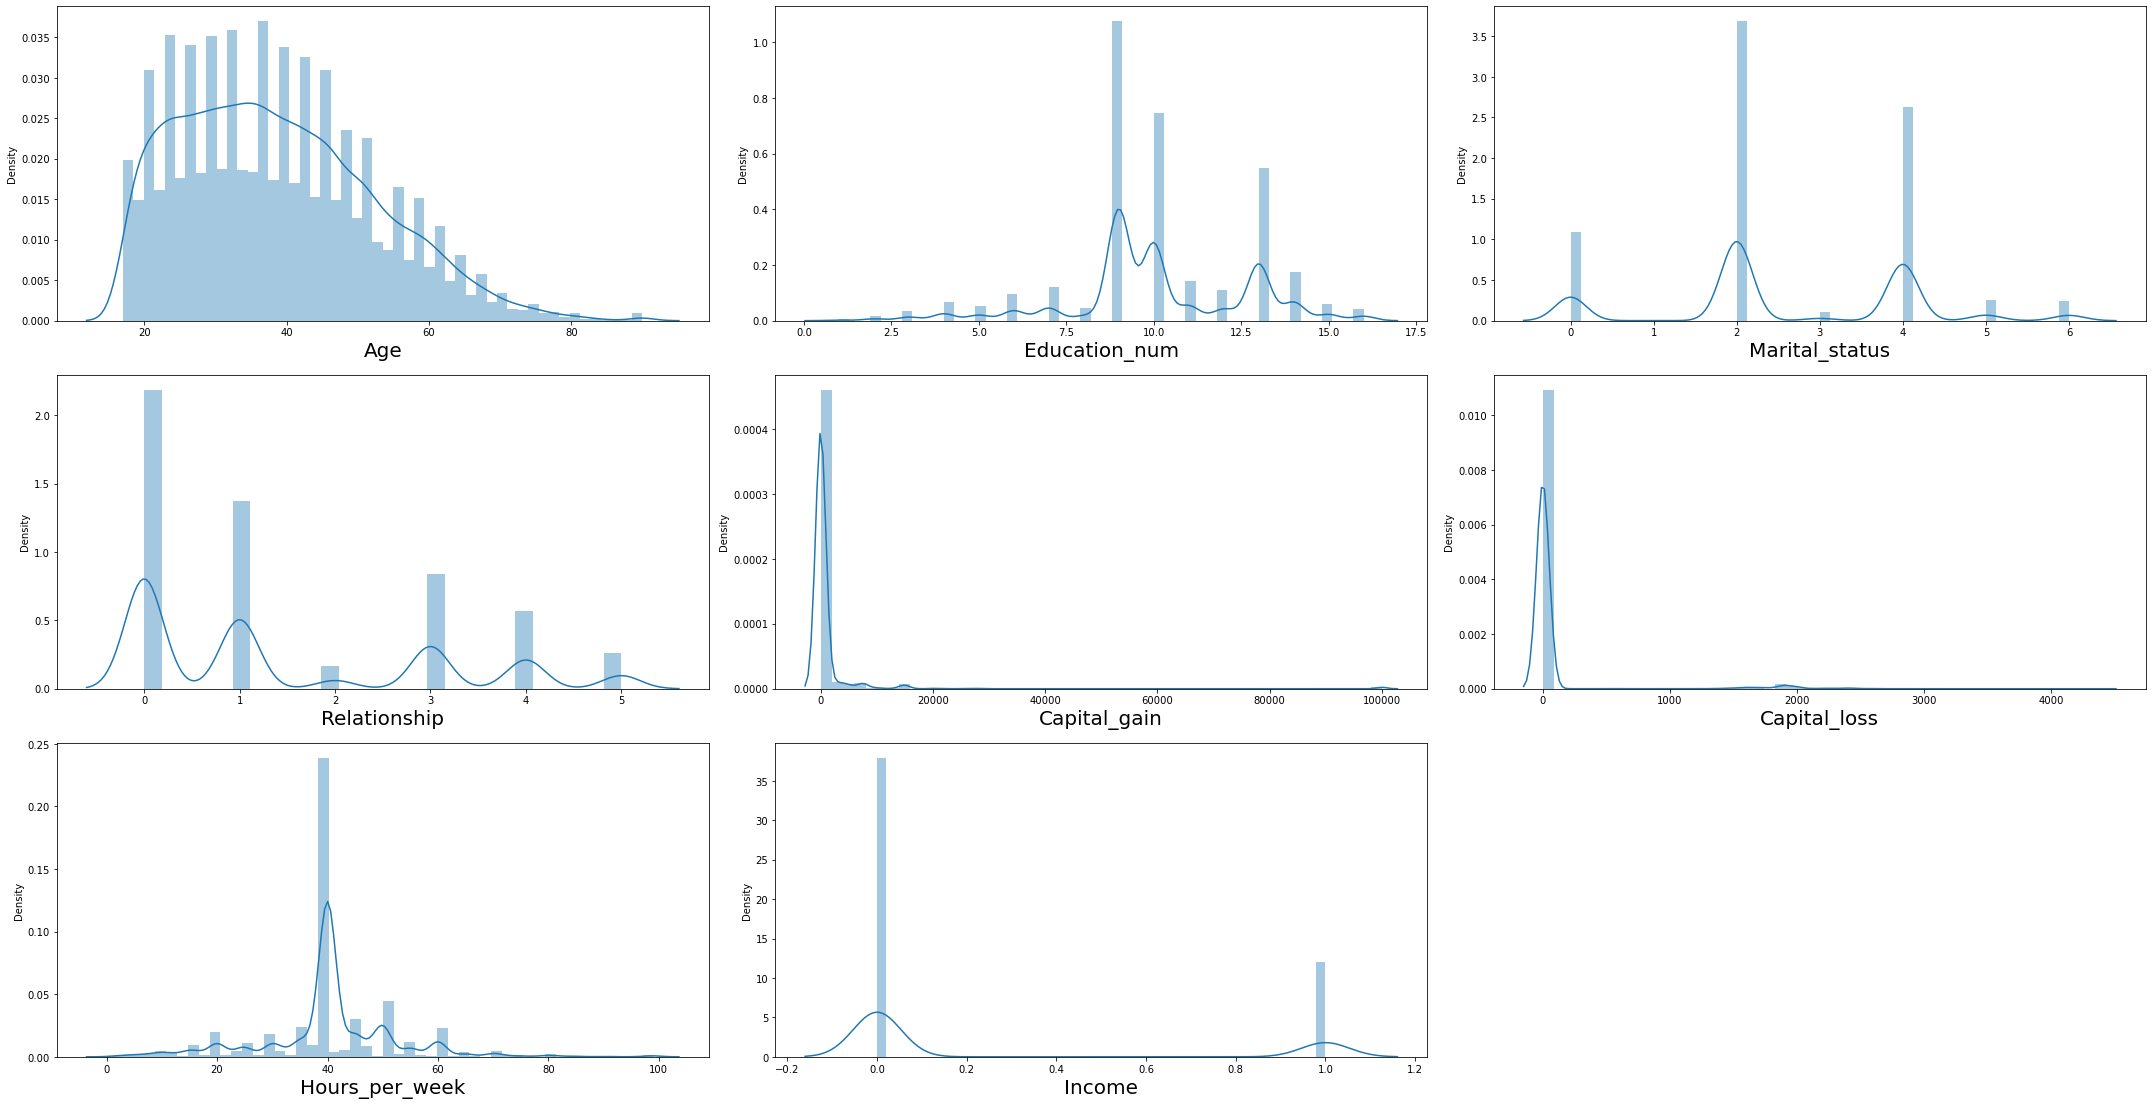

In [243]:
# let's check the distribution of data
plt.figure(figsize = (30,20))
plotnumber = 1

for column in df:
    if plotnumber<=8:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

- as i see data is skewed in Age, education_num, capital_gain, capital_loss, hours_per_week 

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

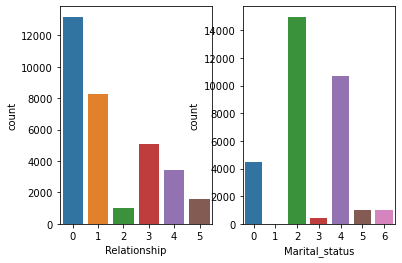

In [244]:
plt.subplot(1,2,1)
sns.countplot(data=df,x=df.Relationship)
plt.subplot(1,2,2)
sns.countplot(data=df,x=df.Marital_status)

- data looks imbalanced here

let's remove skewness first

In [245]:
# removing skewness using 'yeo-johnson'
from sklearn.preprocessing import PowerTransformer
skewed = ['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week',]
scaler = PowerTransformer(method='yeo-johnson')
df[skewed] = scaler.fit_transform(df[skewed].values)

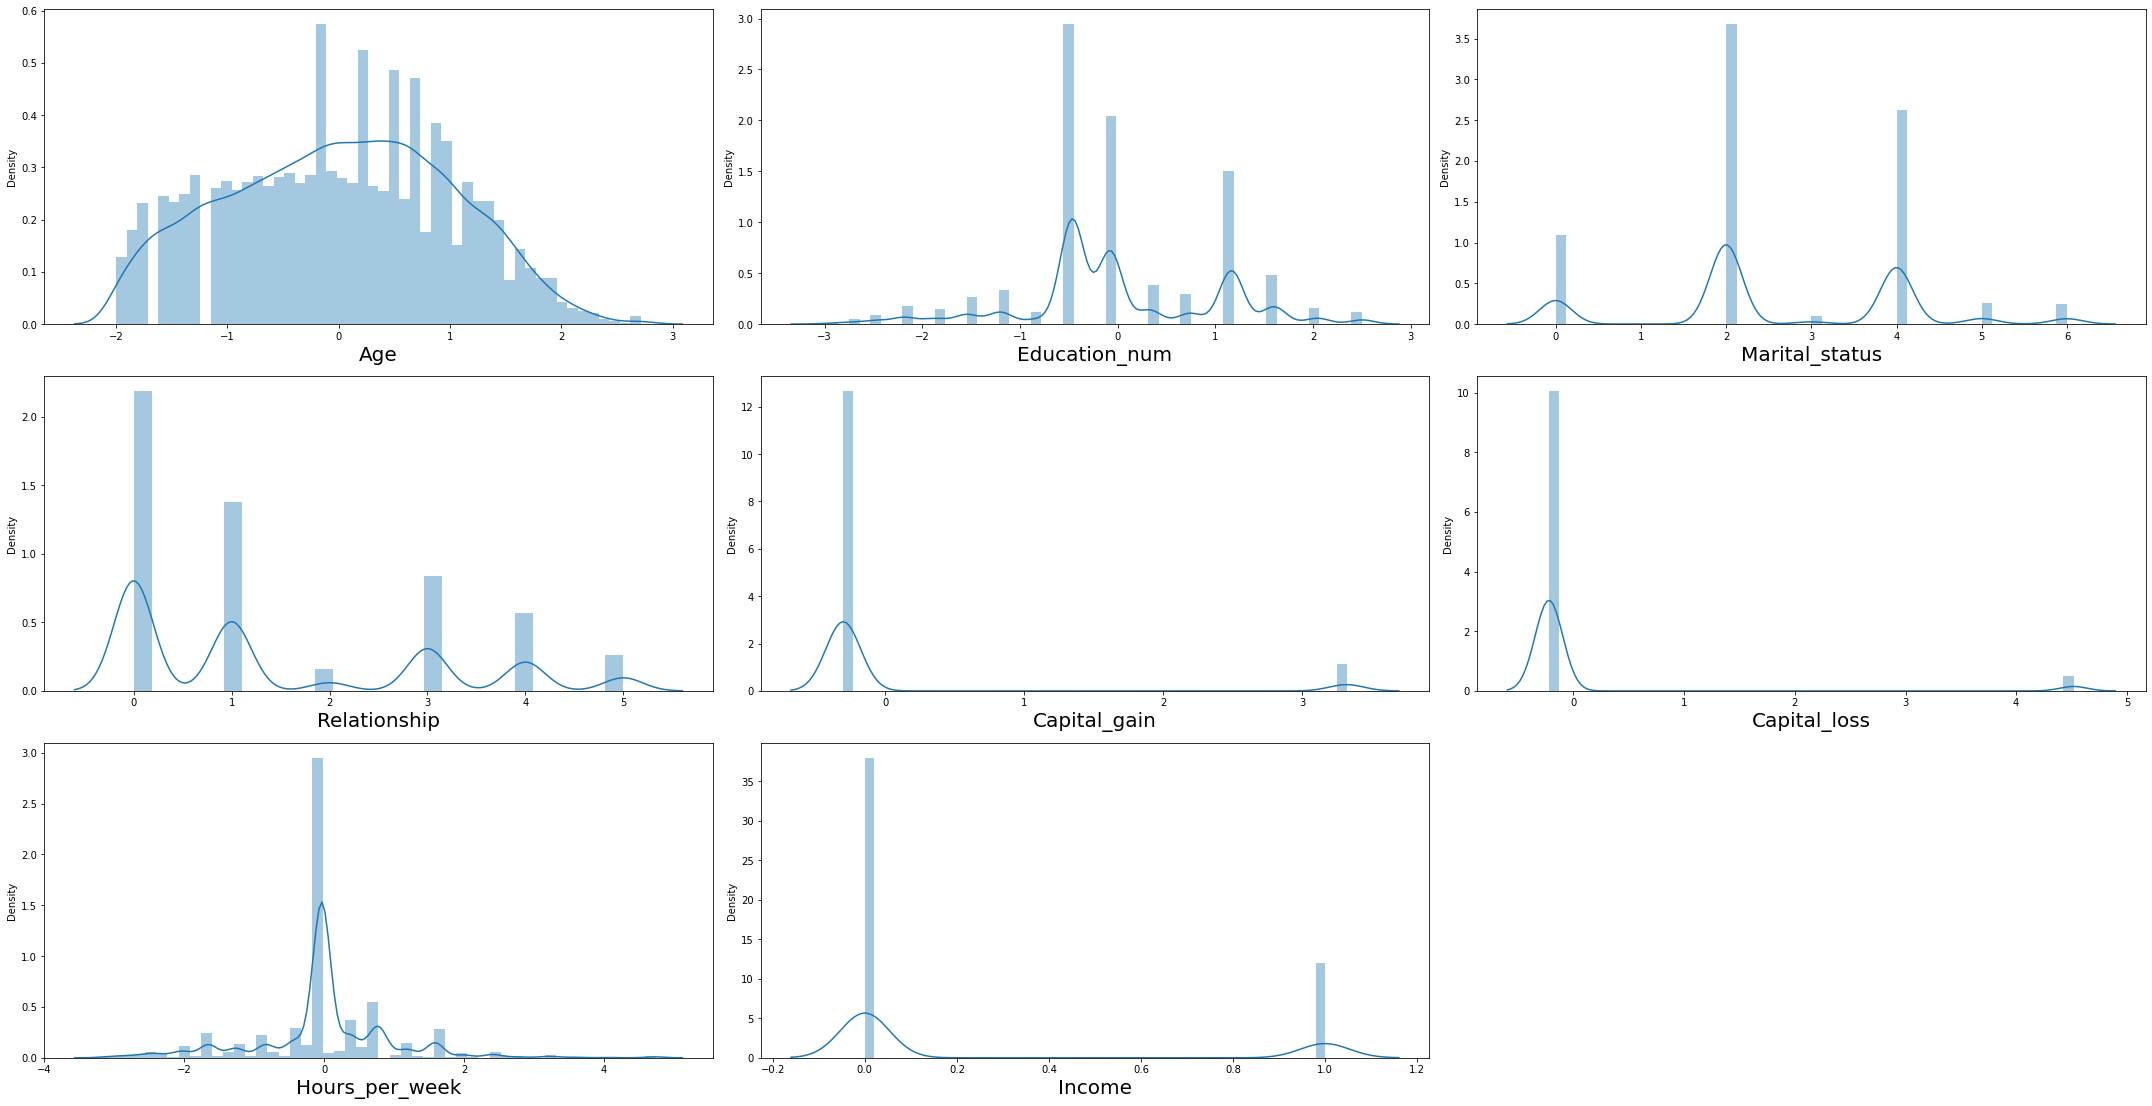

In [246]:
# let's check the distribution of data
plt.figure(figsize = (30,20))
plotnumber = 1

for column in df:
    if plotnumber<=8:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

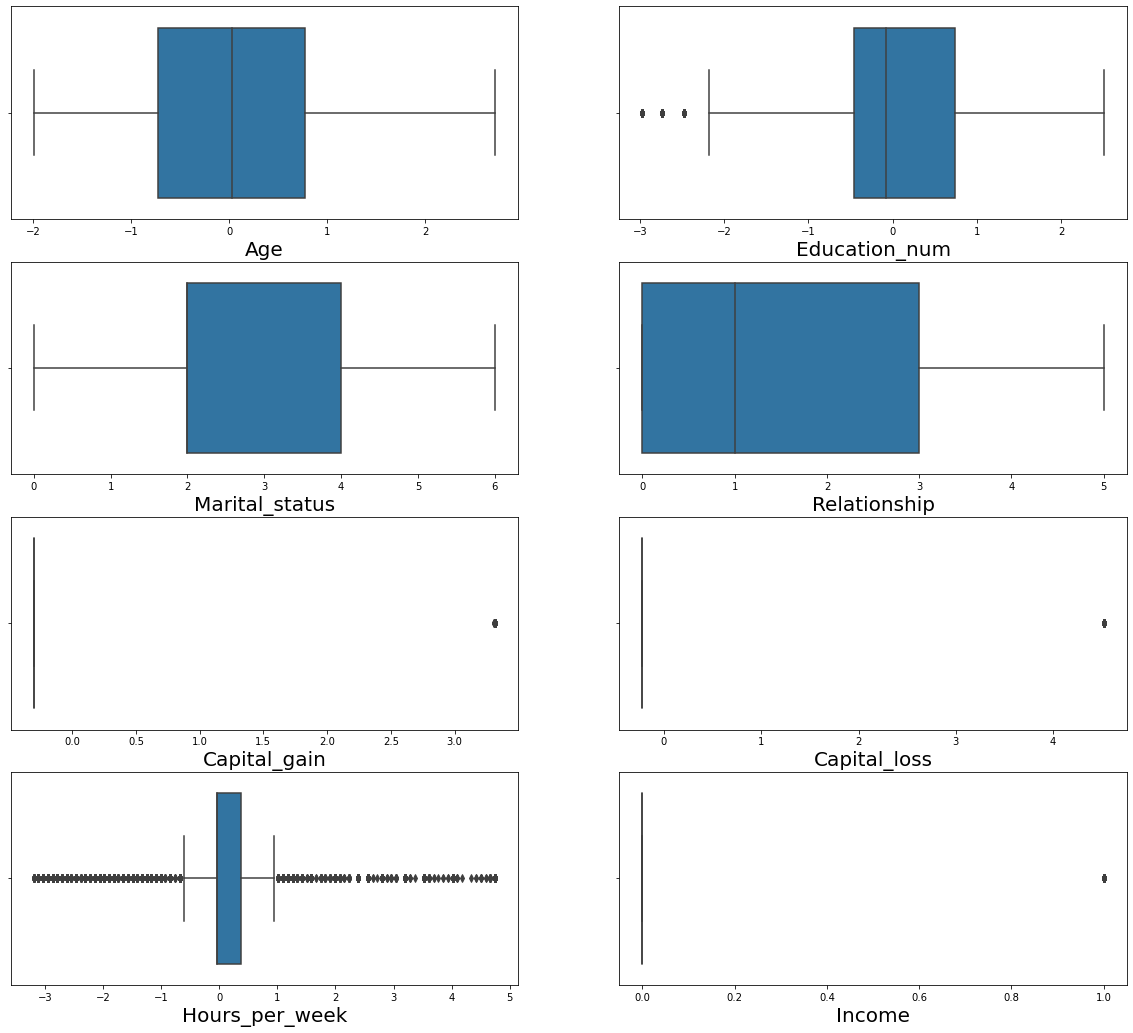

In [247]:
# checking outliers
# checking outliers
plt.figure(figsize=(20,18))
plot = 1
for column in df:
    if plot<=8:
        ax = plt.subplot(4,2,plot)
        sns.boxplot(x=column,data=df)
        plt.xlabel(column,fontsize=20)
    plot+=1
plt.show()

- there are outliers in 2 columns let's remove them and other are categorical columns so we will check the data is imbalanced there or not

In [248]:
# remving outliers from Education_num
min_a, max_a = df.Education_num.quantile([0.035, 1.0])
min_a, max_a

(-2.1841134239171045, 2.50304504069059)

<AxesSubplot:xlabel='Education_num'>

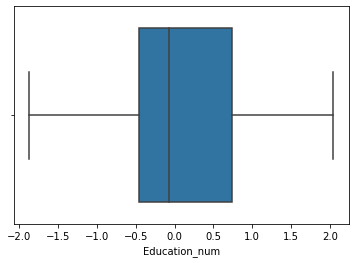

In [249]:
# removing rows containing ouotliers
df = df[(df.Education_num<max_a)&(df.Education_num>min_a)]
sns.boxplot(x=df['Education_num'])

In [250]:
# removing outliers from Hours_per_week
min_a, max_a = df.Hours_per_week.quantile([0.15, 0.895])
min_a, max_a

(-0.8456200335544195, 1.098249919544053)

<AxesSubplot:xlabel='Hours_per_week'>

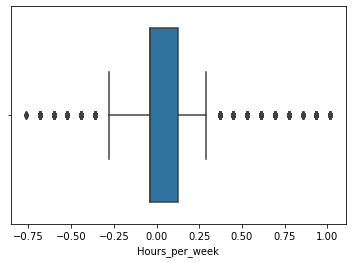

In [251]:
# removing rows containing ouotliers
df = df[(df.Hours_per_week<max_a)&(df.Hours_per_week>min_a)]
sns.boxplot(x=df['Hours_per_week'])

In [253]:
# balancing data using smote
from imblearn.over_sampling import SMOTE

In [264]:
# Splitting data in target and dependent feature
x = df.drop(['Income'], axis =1)
y = df.Income

In [267]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [272]:
y.value_counts()

0    16896
1    16896
Name: Income, dtype: int64

In [269]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### Model building

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [271]:
# finding best random state
 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7581376997435392 on Random_state 936


### Logistic Regression

In [278]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state=936, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7581376997435392


Confusion matrix of Logistics Regression : 
 [[3787 1304]
 [1148 3899]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.77      0.74      0.76      5091
           1       0.75      0.77      0.76      5047

    accuracy                           0.76     10138
   macro avg       0.76      0.76      0.76     10138
weighted avg       0.76      0.76      0.76     10138



### Applying other Classification models

In [279]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7581376997435392


Confusion matrix : 
 [[3787 1304]
 [1148 3899]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.74      0.76      5091
           1       0.75      0.77      0.76      5047

    accuracy                           0.76     10138
   macro avg       0.76      0.76      0.76     10138
weighted avg       0.76      0.76      0.76     10138



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8001578220556322


Confusion matrix : 
 [[3711 1380]
 [ 646 4401]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.73      0.79      5091
           1       0.76      0.87      0.81      5047

    accuracy                           0.80     10138
   macro avg       0.81      0.80      0.80     10138
weighted avg       0.81      0.80      0

In [282]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, x_scaled, y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.74315727 0.74434088 0.73897603 0.74593075 0.73868008]
Mean Score : 0.7422170021263506
Std deviation : 0.0029051878318724187




Cross Validation Score SVC() :

Score : [0.80144992 0.79997041 0.79772122 0.80526783 0.80156851]
Mean Score : 0.801195577971931
Std deviation : 0.0024641110423669517




Cross Validation Score GaussianNB() :

Score : [0.7391626  0.74404498 0.73320509 0.74474697 0.73941995]
Mean Score : 0.7401159157272836
Std deviation : 0.004148176729790473




Cross Validation Score DecisionTreeClassifier() :

Score : [0.78266016 0.80366918 0.84314886 0.85439479 0.84625629]
Mean Score : 0.8260258558940912
Std deviation : 0.027884292846663654




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.71770972 0.75321793 0.77641314 0.79949689 0.78307191]
Mean Score : 0.7659819198682445
Std deviation : 0.028345215869672827




Cross Validation Score RandomForestClassifier() :

Score : [0.7978991  0.810

- hyper parameter tuning 

In [283]:
# i'll tune ExtraTreesClassifier as it is giving best accuray with minimum error
from sklearn.model_selection import GridSearchCV

In [284]:
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }

In [285]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.829 total time=   2.1s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.836 total time=   2.1s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.832 total time=   2.1s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.830 total time=   2.2s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [286]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 5,
 'n_estimators': 150}

### Final model

In [295]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 150, max_depth=20 ,min_samples_split= 5)
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))

Accuracy Score :
 0.8342868415861117


- model is giving save may be i did not give wide range of parameter

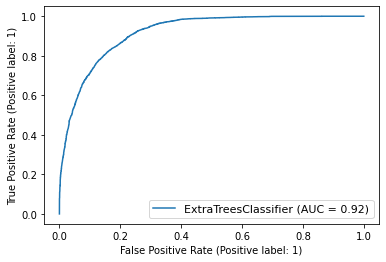

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.8345303119445626


In [296]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
plt.show()
auc_score = roc_auc_score(y_test, Final_mod.predict(x_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

* saving final model

In [297]:
# saving the model
import pickle
filename = 'Income '
pickle.dump(Final_mod, open(filename,'wb'))